GSAPP PLA6113 Wednesday March 24th, 2021
Exploring Urban Data with ML
# Support Vector Machines (SVMs)

Support vector machines (SVMs) are a set of supervised learning methods used for mostly classification.

The advantages of support vector machines are:
* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:
* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

You can find sklearn svm resources as follwoings:
* https://scikit-learn.org/stable/modules/svm.html#svm
* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Example 1. Linearly separable case

In [2]:
data1 = pd.read_csv('../data/Week11_example1.csv')
data1.head()

,x1,x2,y
0,-2.515039,-1.408103,0
1,-1.952127,-2.488405,0
2,-2.354953,-2.391813,0
3,-0.135739,-3.371490,0
4,0.226275,-2.118110,0


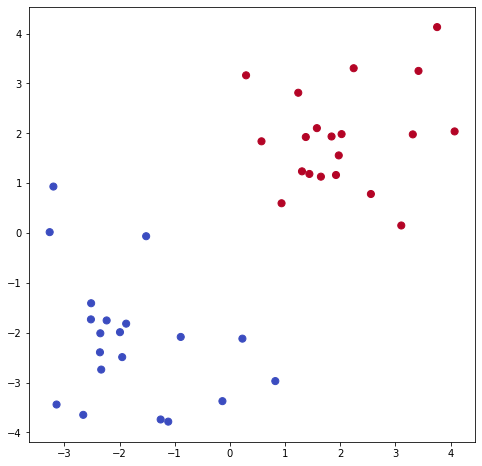

In [3]:
plt.figure(figsize=(8,8))
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

### The dataset is linearly separable! Let's train a linear SVM.

## (1) Load module and build you first svm model

Syntax: 
    
        YOUR_MODEL_NAME = svm.SVC(kernel=KERNEL_TYPE, C=1.0)
        kernel : Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.

In [4]:
from sklearn import svm

In [5]:
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## (2) The separating hyperplane (line)
* The hyperplane is expressed as w1x1 + w2x2 + b = 0

In [6]:
w = clf.coef_[0]
b = clf.intercept_[0]

print ("The hyperplane is: {:.3}x + {:.3}y + {:.3} = 0".format(w[0], w[1], b))

The hyperplane is: 0.663x + 0.564y + 0.0432 = 0


In [7]:
a = -w[0] / w[1]
print("The hyperplane is: y = {:.3}*x{:.3}".format(a,- b / w[1]))

The hyperplane is: y = -1.18*x-0.0767


### (3) List the support vectors

In [8]:
print (clf.support_vectors_)

[[ 0.22627536 -2.11810965]
 [-1.5180363  -0.06399383]
 [ 0.93564585  0.5969359 ]]


### (4) Represent the marginal lines (both down and upside)

In [9]:
s = clf.support_vectors_[0]
print ("The downside margin is: y={:.3}*x{:.3}".format(a,(s[1] - a* s[0])))

s = clf.support_vectors_[1]
print ("The downside margin is: y={:.3}*x{:.3}".format(a,(s[1] - a* s[0])))

s = clf.support_vectors_[-1]
print ("The upside margin is: y={:.3}*x+{:.3}".format(a,(s[1] - a* s[0])))

The downside margin is: y=-1.18*x-1.85
The downside margin is: y=-1.18*x-1.85
The upside margin is: y=-1.18*x+1.7


### (5) Add the separating line to the plot, visualize the margin and mark the support vectors.

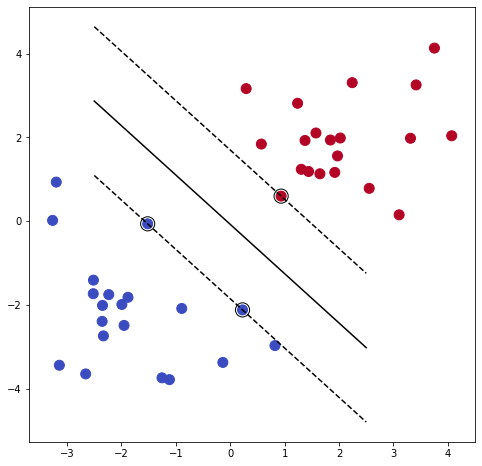

In [10]:
X=np.array(X)

xx = np.linspace(-2.5, 2.5)
yy = a * xx - b / w[1]
s = clf.support_vectors_[0]
yy_down = a * xx + (s[1] - a * s[0])
s = clf.support_vectors_[-1]
yy_up = a * xx + (s[1] - a * s[0])


plt.figure(figsize=(8,8))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.get_cmap('coolwarm', 2),s=100)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='k')
plt.axis('tight')
plt.show()

# Example 2. Artificially generated non-fully separable case

In [11]:
# Genearte data that are not fully seperatable this time.
np.random.seed(999)
mean1 = np.array([0, 2])
mean2 = np.array([2, 0])
cov = np.array([[1.8, 1.0], [1.0, 1.8]])
X1 = np.random.multivariate_normal(mean1, cov, 100)
y1 = np.ones(len(X1))
X2 = np.random.multivariate_normal(mean2, cov, 100)
y2 = np.ones(len(X2)) * -1

# concatenate artificial data
X=np.concatenate((X1,X2),axis=0)
Y=np.concatenate((y1,y2))

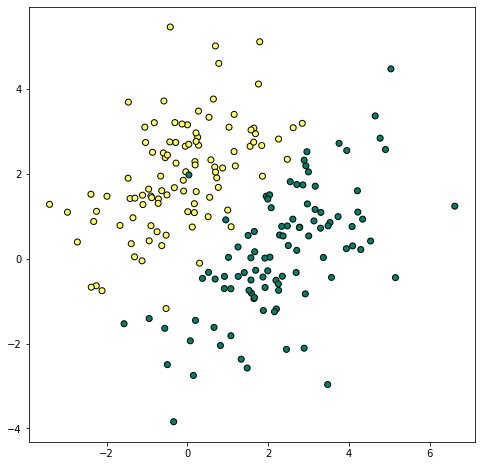

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=Y, cmap='summer', edgecolors='k')
plt.show()

### (1) Build your SVM model with small C for the soft-margin
* Obviousely, we cannot separate this two clusters with a single line.
* Let's use a soft margin classifier model over the entire data with C=1.
* C is a hyperparameter that decides the trade-off between maximizing the margin and minimizing the mistakes. When C is small, classification mistakes are given less importance and focus is more on maximizing the margin, whereas when C is large, the focus is more on avoiding misclassification at the expense of keeping the margin small.

In [13]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, Y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
def classification_region(cmap):

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.summer)
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)

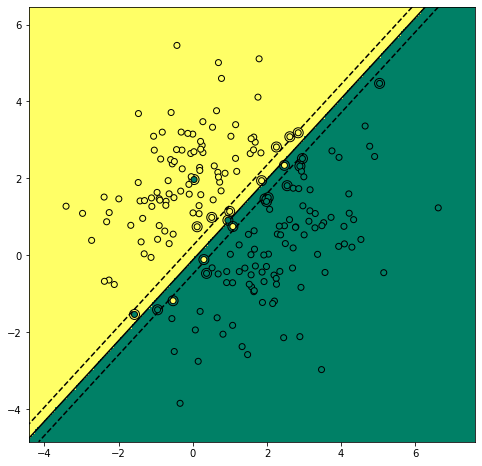

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', zorder=10) 

plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k',cmap=plt.cm.summer) 

classification_region('summer')

plt.axis('tight')
plt.show()

We can see some misclassified data points due to soft-margin. 
### (2) Classification accuracy

In [16]:
print (clf.score(X,Y))

0.965


### (3) Let's do some train/test process

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=990) 

clf = svm.SVC(kernel='linear',C=1) 
clf.fit(X_train, Y_train)

acc_train = clf.score(X_train, Y_train)
acc_test = clf.score(X_test, Y_test)

print ("Train accuracy: ",acc_train.round(3))
print ("Test accuracy: ",acc_test.round(3))

Train accuracy:  0.97
Test accuracy:  0.924


### (4) Find the best performed C (parameter tuning)
As C is a hyperparameter that decides the trade-off between maximizing the margin and minimizing the mistakes, we need to find the optimized C that deliver the best performed classification model.

In [18]:
import math

C = np.linspace(-10,10,300)
C=[math.exp(i) for i in C] 

acc_list = []
for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train, Y_train)
    acc_list.append(clf.score(X_train, Y_train))

In [19]:
print (max(acc_list))
C_opt = C[acc_list.index(max(acc_list))]
print (C_opt)

0.9776119402985075
0.0012036363329626459


### (5) Train the svm classification model using the optimized C and test

In [20]:
clf = svm.SVC(kernel='linear',C=C_opt)
clf.fit(X_train, Y_train)

acc_train = clf.score(X_train, Y_train)
acc_test = clf.score(X_test, Y_test)

print ("Train accuracy: ",acc_train.round(4))
print ("Test accuracy: ",acc_test.round(4))

Train accuracy:  0.9776
Test accuracy:  0.9697


# Example 3. Non-linear separable case - kernel
* If linear hyperplane do not work, Gausian (RBF) or polynomial kernel helps to find non-linear decision boundary
## Radial Basis Function

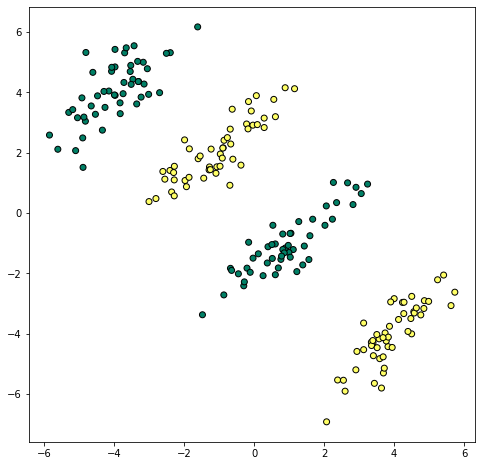

In [21]:
#Generate artifitial data
mean1 = [-1, 2]
mean2 = [1, -1]
mean3 = [4, -4]
mean4 = [-4, 4]
cov = [[1.0,0.8], [0.8, 1.0]]
X1 = np.random.multivariate_normal(mean1, cov, 50)
X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
y1 = np.ones(len(X1))
X2 = np.random.multivariate_normal(mean2, cov, 50)
X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
y2 = np.ones(len(X2)) * -1
X=np.concatenate((X1,X2),axis=0)
Y=np.concatenate((y1,y2))


plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=Y, cmap='summer', edgecolors='k')
plt.show()

### (1) Try to classify data points using 'linear' method

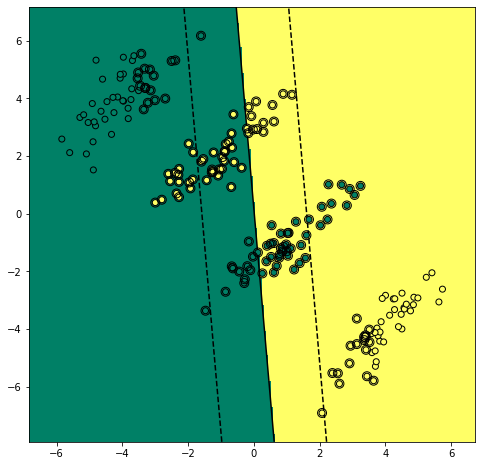

Classification accuracy:  0.62


In [22]:
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)

classification_region('summer')

plt.axis('tight')
plt.show()

print ("Classification accuracy: ",clf.score(X,Y))

### (2) Use radial basis function (rbf) - Gaussian kernel - with low gamma value first
* gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region. When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad. When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points. We will see this very clearly below.

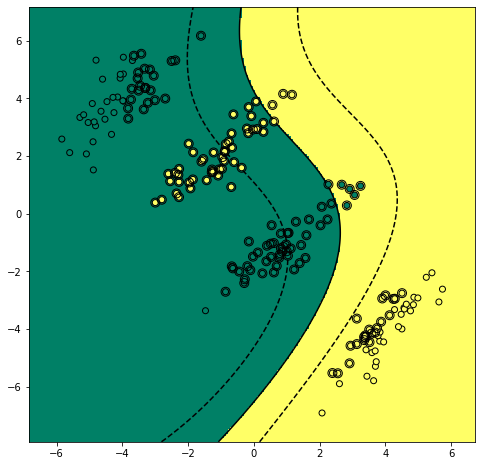

Classification accuracy:  0.735


In [23]:
clf = svm.SVC(kernel='rbf', gamma=0.01) 
clf.fit(X, Y)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)

classification_region('summer')

plt.axis('tight')
plt.show()

print ("Classification accuracy: ",clf.score(X,Y))

### The decision boundary looks still wierd, but the classification accuracy has increased.
### (3) Try again with higher gamma values

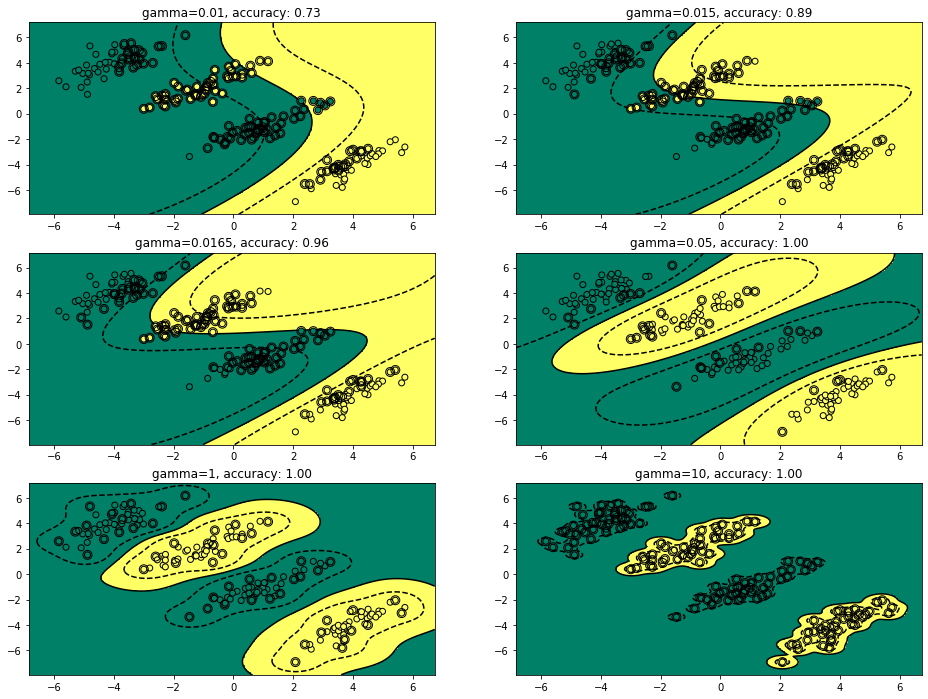

In [24]:
fig = plt.figure(figsize=(16,12))

# gamma = 0.01 
plt.subplot(3,2,1)
clf = svm.SVC(kernel='rbf', gamma=0.01) 
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
# classification_region(-10,10,-10,10)
classification_region('summer')
plt.title('gamma=0.01, accuracy: %.2f' %(clf.score(X,Y)))
plt.axis('tight')

# gamma = 0.015 
plt.subplot(3,2,2)
clf = svm.SVC(kernel='rbf', gamma=0.015) 
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
# classification_region(-10,10,-10,10)
classification_region('summer')
plt.title('gamma=0.015, accuracy: %.2f' %(clf.score(X,Y)))
plt.axis('tight')

# gamma = 0.0165 
plt.subplot(3,2,3)
clf = svm.SVC(kernel='rbf', gamma=0.0165) 
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
# classification_region(-10,10,-10,10)
classification_region('summer')
plt.title('gamma=0.0165, accuracy: %.2f' %(clf.score(X,Y)))
plt.axis('tight')

# gamma = 0.05 
plt.subplot(3,2,4)
clf = svm.SVC(kernel='rbf', gamma=0.05) 
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
# classification_region(-10,10,-10,10)
classification_region('summer')
plt.title('gamma=0.05, accuracy: %.2f' %(clf.score(X,Y)))
plt.axis('tight')

# gamma = 0.1 
plt.subplot(3,2,5)
clf = svm.SVC(kernel='rbf', gamma=1) 
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
# classification_region(-10,10,-10,10)
classification_region('summer')
plt.title('gamma=1, accuracy: %.2f' %(clf.score(X,Y)))
plt.axis('tight')

# gamma = 10
plt.subplot(3,2,6)
clf = svm.SVC(kernel='rbf', gamma=10) 
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, edgecolors='k', cmap=plt.cm.summer)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
# classification_region(-10,10,-10,10)
classification_region('summer')
plt.title('gamma=10, accuracy: %.2f' %(clf.score(X,Y)))
plt.axis('tight')

plt.show()

# In-class challenge
* Build a linear SVM and a rbf SVM and compare results
* Once you decide which model is better, split train and test data
* Try different parameters and print train/test accuracy
* Plot with classification regions and support vectors

### (1) Example data 1

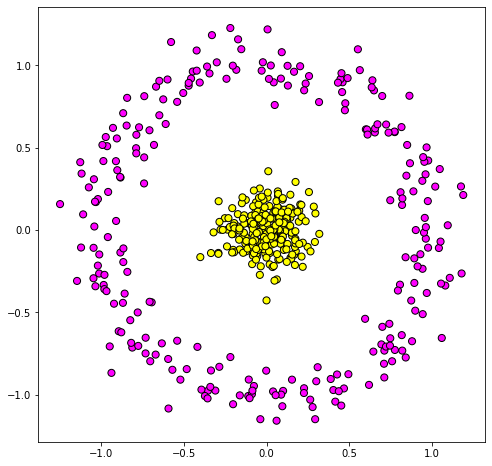

In [25]:
# Let's see this data we could use Guassian kernel SVM
from sklearn.datasets.samples_generator import make_circles
X, Y = make_circles(500, factor=.1, noise=.1,random_state=999)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring', edgecolors='k')

### (2) Example data 2

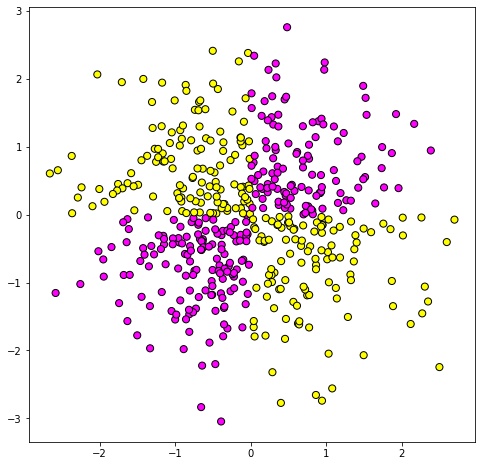

In [26]:
#generate data
np.random.seed(0)
X = np.random.randn(500, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)*1

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring', edgecolors='k')

### (3) Example data 3

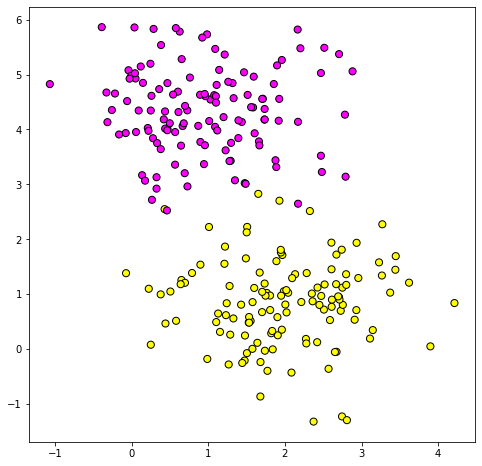

In [27]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.80)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='spring', s=50, edgecolors='k')

### (4) Example data 4

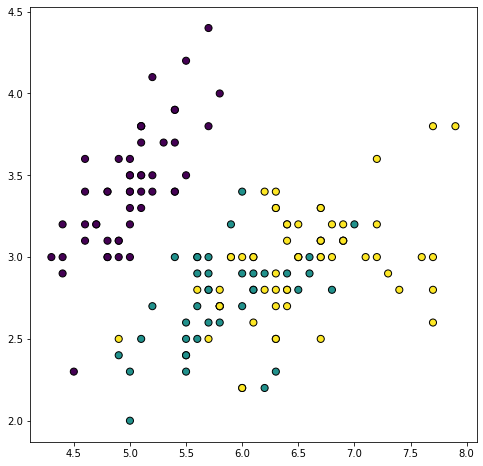

In [28]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')

Classification accuracy:  0.82


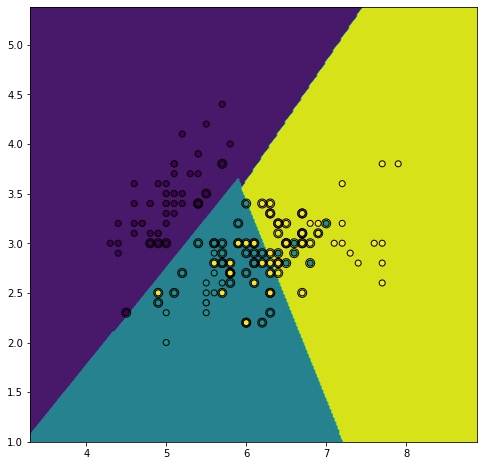

In [29]:
clf = svm.SVC(kernel='linear') 
clf.fit(X, y)

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolors='k', cmap=plt.cm.viridis)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', edgecolors='k',zorder=10)
h=0.02

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.viridis)

print ("Classification accuracy: ",clf.score(X,y))